# SAT Scores Analysis in New York City High Schools

## Table of Contents

- [Introduction](#Introduction)
- [Read in the Data](#Read-in-the-Data)
- [Read in the Surveys](#Read-in-the-Surveys)
- [Add DBN columns](#Add-DBN-columns)
- [Convert Columns to Numeric Data Types](#Convert-Columns-to-Numeric-Data-Types)
- [Condense Datasets](#Condense-Datasets)
- [Convert AP Scores to Numeric Data Type](#Convert-AP-Scores-to-Numeric-Data-Type)
- [Combine the Datasets](#Combine-the-Datasets)
- [Add a School District Column for Mapping](#Add-a-School-District-Column-for-Mapping)
- [Finding Correlations](#Finding-Correlations)
- [Plotting Survey Correlations](#Plotting-Survey-Correlations)
- [Exploring Safety and SAT Scores](#Exploring-Safety-and-SAT-Scores)
- [Relationship Between Student and SAT Scores (Boroughs)](#Relationship-Between-Student-and-SAT-Scores-(Boroughs))
- [Exploring Race and SAT Scores](#Exploring-Race-and-SAT-Scores)
- [Relationship Between Hispanic Students and SAT Scores](#Relationship-Between-Hispanic-Students-and-SAT-Scores)
- [Exploring Gender and SAT Scores](#Exploring-Gender-and-SAT-Scores)
- [Relatioship Between Female Percentage and SAT Scores](#Relatioship-Between-Female-Percentage-and-SAT-Scores)
- [Exploring AP Scores vs. SAT Scores](#Exploring-AP-Scores-vs.-SAT-Scores)
- [Exploring Class Size vs SAT Scores](#Exploring-Class-Size-vs.-SAT-Scores)
- [Conclusion](#Conclusion)

# Introduction

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests and whether they're unfair to certain groups. The [SAT](https://en.wikipedia.org/wiki/SAT), or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's important to perform well.

Our analysis in this project wil entail focusing on SAT in New York City high schools, and explore the effects of various characteristics such as class size, race, gender, etc on SAT results.

# Read in the Data

We have several files containing unique sets of information. Below are the dataset links to access the sources.

|Dataset|Description|
|-------------|-----------|
|[SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4/about_data)|SAT scores for each high school in New York City|
|[School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt/about_data)|Attendance information for each school in New York City|
|[Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3/about_data)|Information on class size for each school|
[AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e/about_data)|Advanced Placement (AP) exam results for each high school|
|[Graduation outcomes](https://data.cityofnewyork.us/login)|The percentage of students who graduated and other outcome information|
|[Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j/about_data)|Demographic information for each school|
|[School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8/about_data)|Surveys of parents, teachers, and students at each school|

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib to display plots inline
%matplotlib inline

# List of dataset file names
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# Dictionary to store Dataframes
data = {}

# Filling in the dictionary with our Dataset
for f in data_files:
    key_name = f.replace(".csv", "")
    d = pd.read_csv("schools/{0}".format(f))
    data[key_name] = d

# Read in the Surveys

In [7]:
# Reading in the files
# The files are tab delimeted and encoded with windows-1252

all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

# Concatenate the two survey datasets along axis=0
survey = pd.concat([all_survey, d75_survey], axis=0)

# Convert the dbn column in survey from lower to uppercase
survey = survey.copy()
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# Select useful fields from the survey_fiels that we will use for analysis
survey = survey[survey_fields]

# Store the cleaned and survey data in the data dictionary
data["survey"] = survey

# Verifying the data dictionary
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

# Add DBN columns

In [9]:
# Add a 'DBN' column to the 'hs_directory dataset'
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# A helper function to pad CSD number with a leading zero if necessary.
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation

# Applying the function above to create a 'padded_csd' column to 'class_size' dataset
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# Creating DBN column in class_size by concatenating 'padded_csd' and 'SCHOOL CODE' columns.
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

# Convert Columns to Numeric Data Types

In [11]:
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [12]:
# List of columns in 'sat_results' dataset to converted into numeric types
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# Converting each specified column to numeric type and coercing non-numeric types to NaN
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Calculating the total SAT score by summing up the columns above and assigning the results
# to a new column 'sat_score'
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

# Helper function to extract the latitude from the 'Location 1' column in hs_directory
def find_lat(loc):
    coords = re.findall(r"\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# Helper function to extract the latitude from the 'Location 1' column in hs_directory
def find_lon(loc):
    coords = re.findall(r"\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

# Use the helper functions above to extract latitude and longitude, and also to
# create 'lon' and 'lat' columns in hs_directory
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# Converting the 'lat' and 'lon' to numeric data type
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# Condense Datasets

In [14]:
# Filter class_size dataset to only include high school grades and
# general education programs
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

# Groupby 'DBN', get the mean of of each group, condense the dataset
class_size = class_size.groupby("DBN").agg('mean', numeric_only=True)

# Reset the index to restore DBN to column
class_size.reset_index(inplace=True)
data["class_size"] = class_size # save the changes back to class_size

# Filter 'demographics' to only include data for 2011 and 2012
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

# Filter 'graduation' to focus on 2006 cohort and total Demographic cohort 
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Convert AP Scores to Numeric Data Type

In [16]:
# Columns in 'ap_2010' dataset to be converted to numeric data type
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# Loop in to convert all the specified columns in the 'ap_2010' 
# dataset to numeric data type
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Combine the Datasets

In [18]:
# Using sat_results as the primary dataset for merging
combined = data["sat_results"]

# Merge 'ap_2010' to combined using the left merge
combined = combined.merge(data["ap_2010"], on="DBN", how="left")

# Merge the 'graduation' dataset to combined using the left merge
combined = combined.merge(data["graduation"], on="DBN", how="left")

# List of dataset to merge with combined
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

# Iterate through the list and merge the datasets to combined using the inner merge
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

# Filling in missing values in numeric columns  with the mean of their columns
combined = combined.fillna(combined.mean(numeric_only=True))

# Replacing NaN values with 0, infer the most appropriate data types
combined = combined.infer_objects(copy=False).fillna(0)

# Add a School District Column for Mapping

In [20]:
# Helper function to slice the first two characters of a column; 'dbn'
def get_first_two_chars(dbn):
    return dbn[0:2]

combined = combined.copy() # creating a copyp of the dataframe

# Creating a 'school_dist' column by applying the function above to 'DBN' column
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# Finding Correlations

In [22]:
correlations = combined.corr(numeric_only=True)
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64


# Plotting Survey Correlations

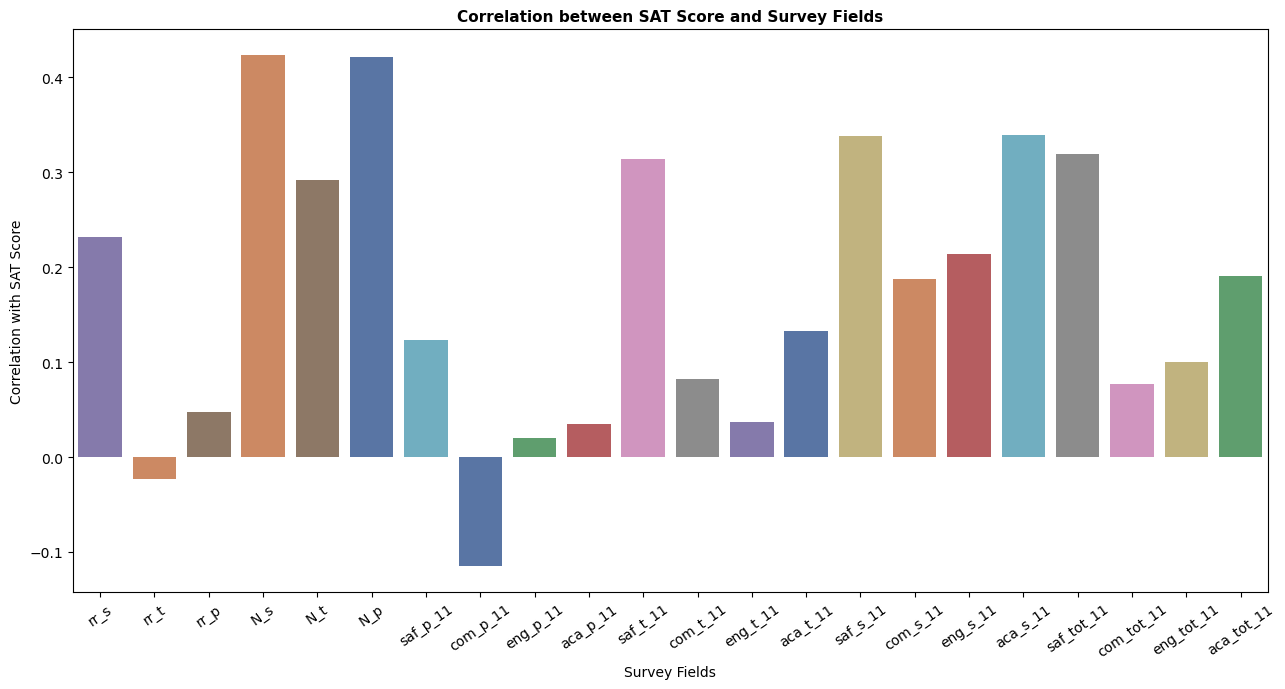

In [36]:
# Filter the combined dataset to include the applicable columns in conjunction with sat_score.
combined_filter = combined[['sat_score'] + survey_fields]

# Correlation of 'survey_fields' with 'sat_score'
survey_fields_corr = combined_filter.corr()['sat_score'].drop('sat_score')

#plot the correlations
plt.figure(figsize=(13,7))
sns.barplot(x=survey_fields_corr.index, 
            y=survey_fields_corr.values, 
            hue=survey_fields_corr.values, 
            palette='deep', legend=False)

# Add labels to the plot
plt.xlabel('Survey Fields')
plt.ylabel('Correlation with SAT Score')
plt.title('Correlation between SAT Score and Survey Fields', 
          weight='bold', size=11)
plt.xticks(rotation=35)

# Display the plot
plt.tight_layout()
plt.show()



There are notable correlations between `Survey Fields` and `SAT Score`. The possitive correlations include;
- N_s (Number of Student Respondents)
- N_p (Number of Parent Respondents)
- saf_s_11 (Safety and Respect Score from Students)
- aca_s_11 (Academic Expectations Score from Students)

Negative/Low correlations include;
- rr_t (Teacher Response Rate)
- com_p_11 (Communication Score from Parents)

The insights above shows that student and parent engagement alongside perceptions of safety and academic expectations have stronger correlations with SAT scores than teacher response rates and parent communication scores

# Exploring Safety and SAT Scores

We have noticed that `saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school correlate highly with `sat_score`. We'll dig into this relationship a bit more and try to figure out which schools have low safety scores 

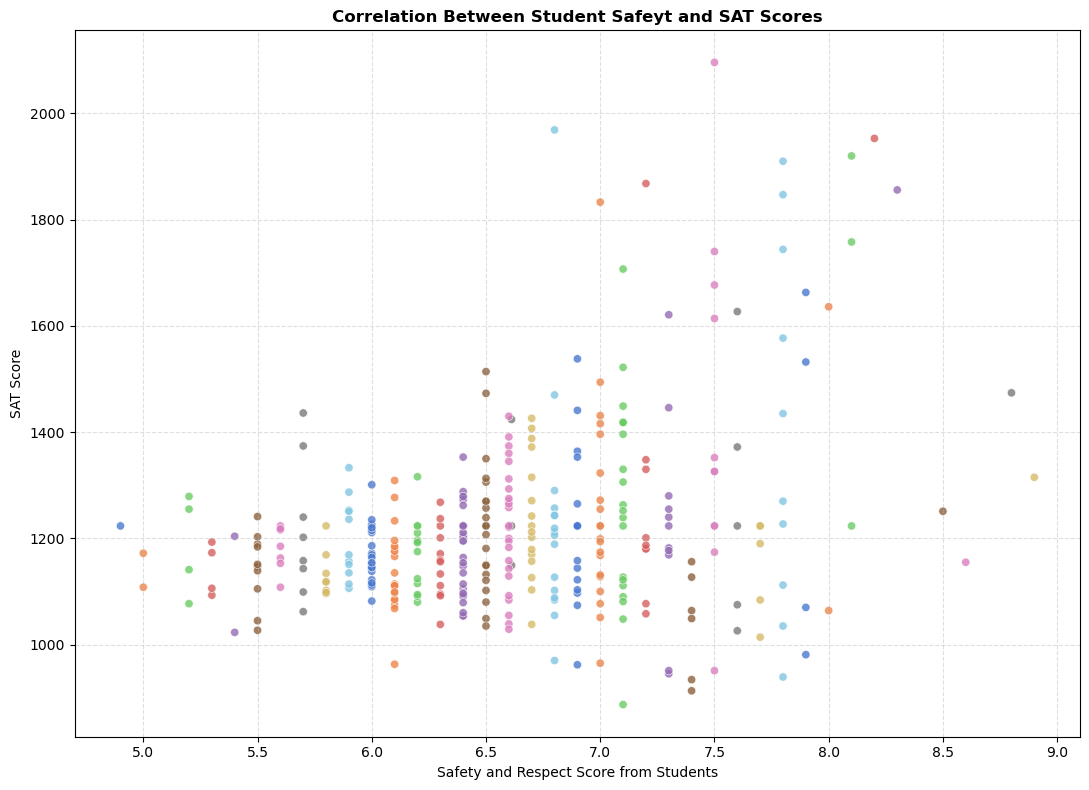

In [50]:
# Creat a scatter plot

plt.figure(figsize=(11, 8))

sns.scatterplot(data=combined, 
                x='saf_s_11',
               y='sat_score',
               hue=combined['saf_s_11'],
               palette='muted',
               alpha=0.8,
               legend=False)

# Add titles and labels
plt.title('Correlation Between Student Safeyt and SAT Scores', weight='bold')
plt.xlabel('Safety and Respect Score from Students')
plt.ylabel('SAT Score')
plt.grid(True, linestyle='--', alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()


The scatter plot above shows a possitive trend indicative of the fact that high level of student safety and respect scores are directly proportional/generally associated with high SAT scores. This suggests that a higher sense of safety and respect in the school environment may boost academic perfomance.Be that as it may, this should be part of a broader strategy addressing multiple influences on performance. 

# Relationship Between Student and SAT Scores (Boroughs)

In [46]:
boroughs_grouped = pd.DataFrame(
    {
        'Mean safety': combined.groupby('boro').agg('mean', numeric_only=True)['saf_s_11'],
        'Value counts': combined['boro'].value_counts()
    }
)

boroughs_grouped.index.name = 'Borough'
boroughs_grouped.reset_index(inplace=True)
print(boroughs_grouped)

         Borough  Mean safety  Value counts
0          Bronx     6.606577            93
1       Brooklyn     6.370755           106
2      Manhattan     6.831370            90
3         Queens     6.721875            64
4  Staten Island     6.530000            10


<Figure size 1100x700 with 0 Axes>

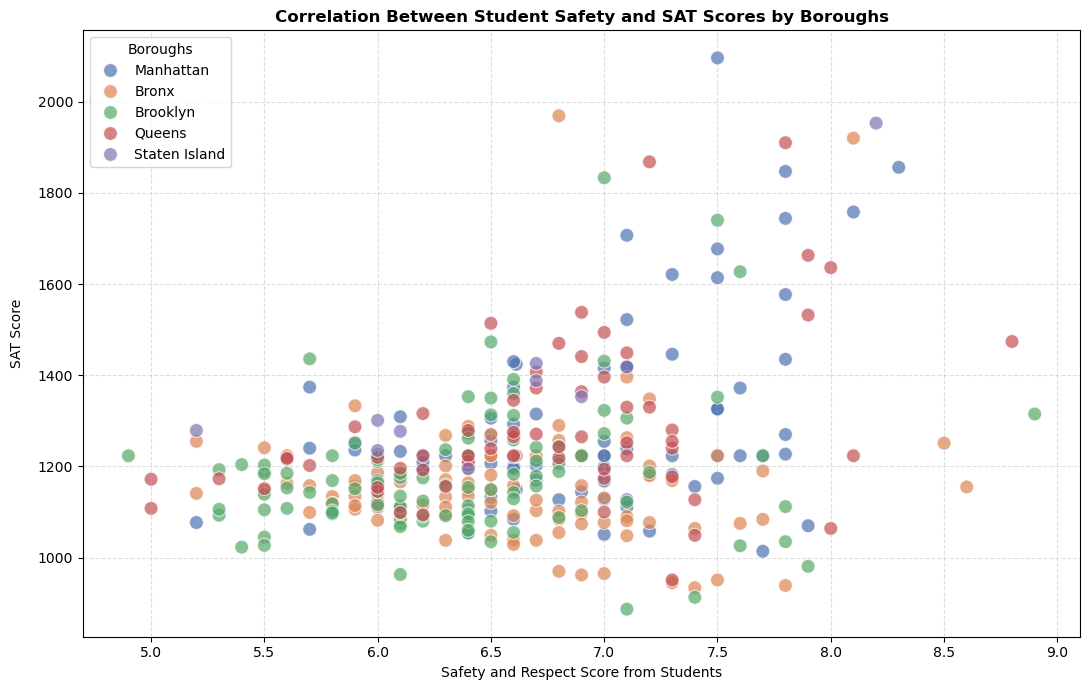

In [124]:
# Create a scatterplot

plt.figure(figsize=(11, 7))

sns.scatterplot(data=combined,
               x='saf_s_11',
               y='sat_score',
               hue=combined['boro'],
               palette='deep',
               s=100,
               alpha=0.7)

# Add titles and labels
plt.title('Correlation Between Student Safety and SAT Scores by Boroughs', weight='bold')
plt.xlabel('Safety and Respect Score from Students')
plt.ylabel('SAT Score', labelpad=10)
plt.legend(title='Boroughs', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The scatter plot above shows a possitive correlation between student safety and SAT scores across boroughs. We can however see that the strength of this relationship varies by borough as explained below;
- Manhattan shows higher SAT scores and safety ratings, indicative that schools in Manhattan may be providing environments that are safe and academic-supportive.
- The Bronx tends to have lower SAT scores and safety ratings, indicating that schools in this borough may be facing hurdles when it comes to student safety and academic performance.

# Exploring Race and SAT Scores

<Figure size 1100x700 with 0 Axes>

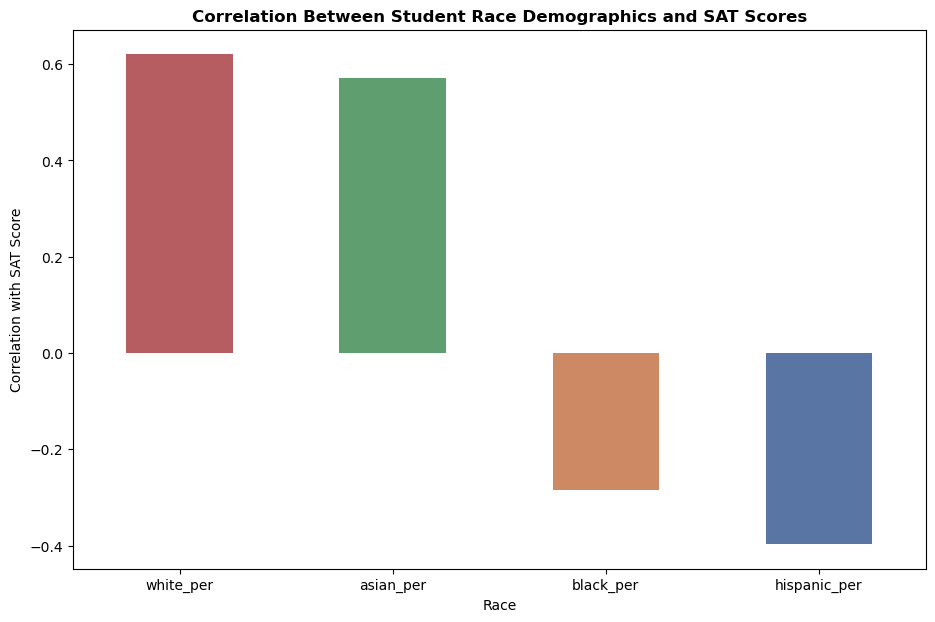

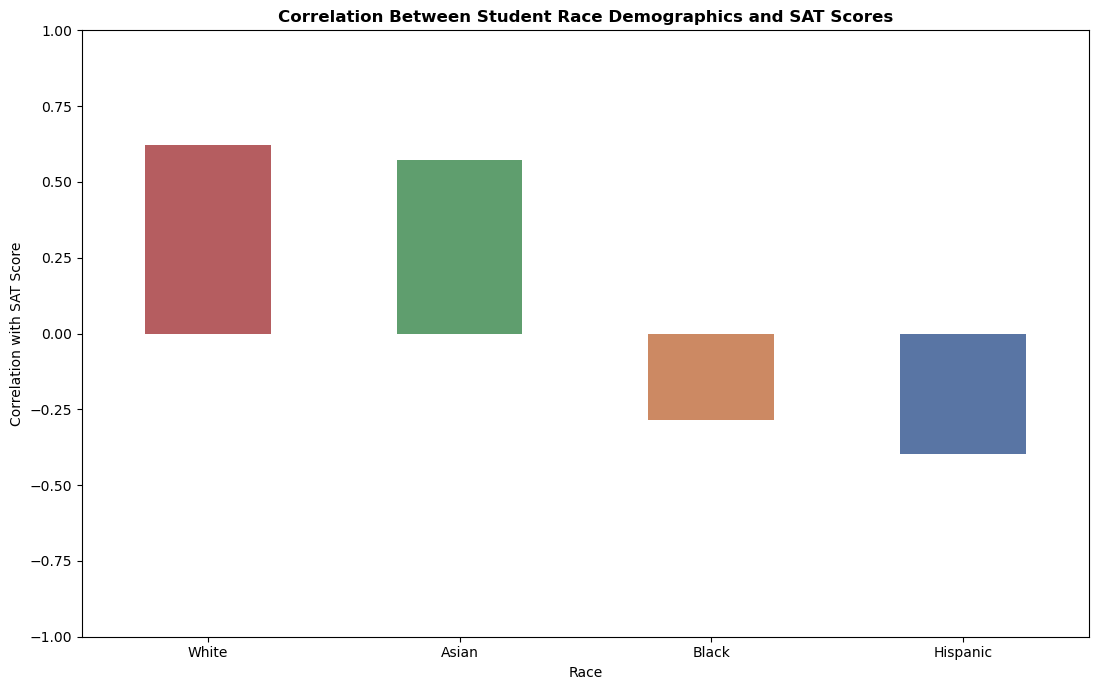

In [64]:
# Select the relevant columns for the analysis
race_columns = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
race_combined = combined[['sat_score'] + race_columns]

# Finding the correlation between SAT score and racial groups
race_fields_cor = race_combined.corr()['sat_score'].drop('sat_score')

# The plot
plt.figure(figsize=(11,7))

sns.barplot(x=race_fields_cor.index,
           y=race_fields_cor.values,
           hue=race_fields_cor.values,
           palette='deep',
           legend=False,
           width=0.5)
plt.xlabel('Race')
plt.ylabel('Correlation with SAT Score')
plt.title('Correlation Between Student Race Demographics and SAT Scores', weight='bold')
plt.xticks(ticks=race_fields_cor.index,
          labels=['White', 'Asian', 'Black', 'Hispanic'])
plt.tight_layout()
plt.ylim(-1, 1)
plt.show()

From the visualization above, we can see a **possitive correlation** of SAT scores with `White` and `Asian` populated schools. This suggests that these groups tend to perform better on the SAT.
On the other hand, we can see a **negative correlation** of SAT scores with `Black` and `Hispanic` populated schools. This indicates that these groups tend to have lower SAT scores on average.
In conclusion, the anlysis reveals that there is a significant disparity in SAT performance among different racial groups.

# Relationship Between Hispanic Students and SAT Scores

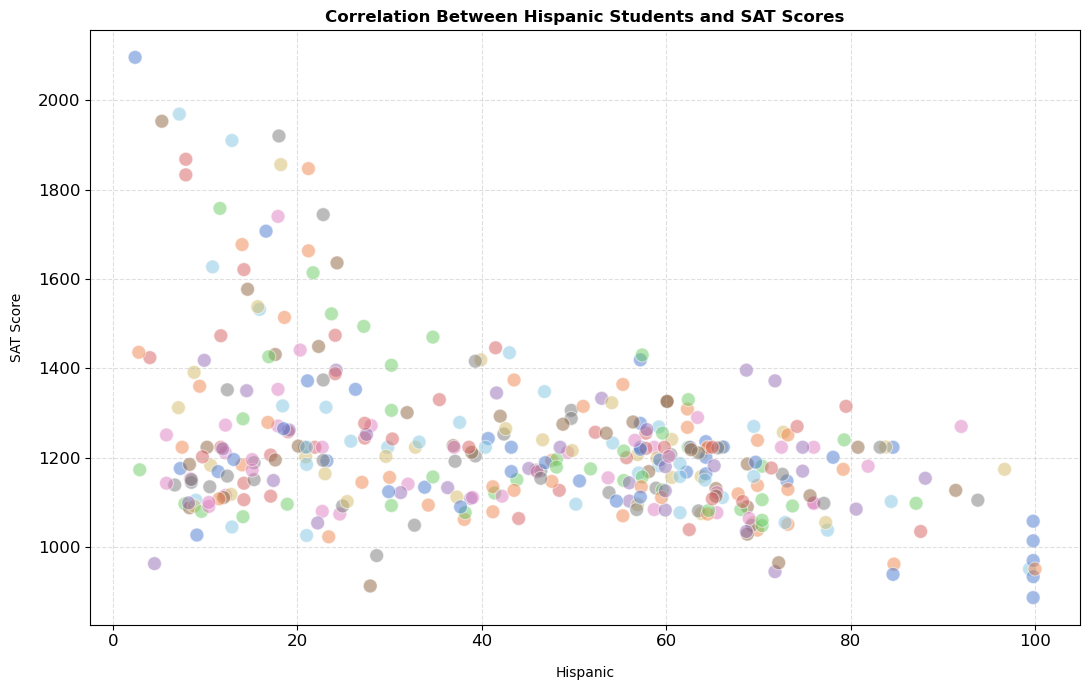

In [70]:
# Create scatterplot
plt.figure(figsize=(11,7))

sns.scatterplot(data=combined,
               x='hispanic_per',
               y='sat_score',
               hue=combined['hispanic_per'],
               palette='muted',
               s=100,
               alpha=0.5,
               legend=False)

# Add titles and labels
plt.title('Correlation Between Hispanic Students and SAT Scores', weight='bold')
plt.xlabel('Hispanic', labelpad=12)
plt.ylabel('SAT Score', labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The plot shows a negative correlation between Hispanic students and SAT scores. Schools with a higher percentage of Hispanic students tend to have a lower SAT scores, while schools with lower percentatges tend to score higher on SAT.
The observations above might suggest inequity in resource allocation, academic support, soci-economic factors such as immigration affecting schools with higher hispanic populations

In [74]:
hispanic_schools = combined[combined['hispanic_per'] > 95]
print(hispanic_schools['SCHOOL NAME'])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools listed above appear to primarily serve recent immigrants to the U.S. These schools have many students who are learning English, which would explain the lower SAT scores.

In [78]:
low_hispanic_schools = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]
print(low_hispanic_schools['SCHOOL NAME'])
            

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools with low Hispanic populations and high SAT scores are known for their selective admissions processes, academic rigor, and strong college preparation programs. Their success underscores the role of specialized educational tracks and rigorous academic environments in achieving high student performance.

#### Sources
- [Stuyvesant](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/stuyvesant-high-school-13092)
- [Bronx High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/bronx-high-school-of-science-13207)
- [Brooklyn Technical High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/brooklyn-technical-high-school-13269)
- [Queens High School for the Sciences at York College](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/queens-high-school-for-the-sciences-at-york-college-13364)
- [Staten Island Technical High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/staten-island-technical-high-school-13391)

# Exploring Gender and SAT Scores

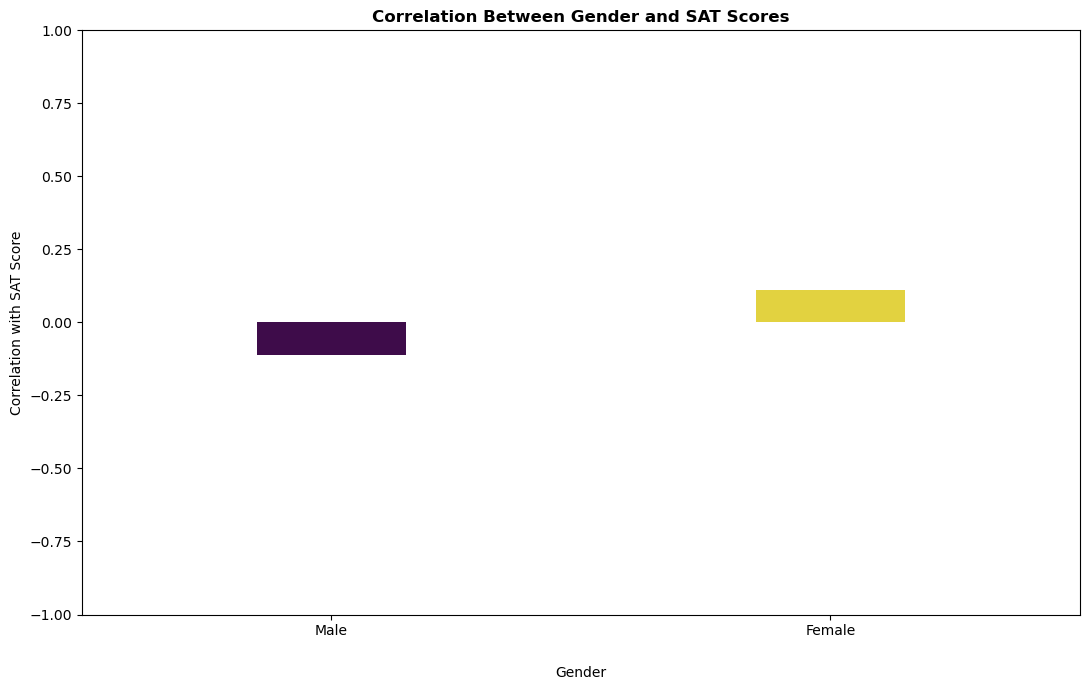

In [82]:
# Columns relevant for analysis
all_gender = combined[['sat_score', 'male_per', 'female_per']]

# Correlation between SAT scores and gender percentages
gender_correlation = all_gender.corr()['sat_score'].drop('sat_score')

# Bar plot for visualization
plt.figure(figsize=(11, 7))

# Plotting the correlations using seaborn barplot
sns.barplot(x=gender_correlation.index,
           y=gender_correlation.values,
           palette='viridis',
            hue=gender_correlation.values,
           width=0.3,
           legend=False)

# labels and title
plt.xlabel('Gender', labelpad=20)
plt.ylabel('Correlation with SAT Score')
plt.title('Correlation Between Gender and SAT Scores', weight='bold')
plt.xticks(ticks=gender_correlation.index,
          labels=['Male','Female'])

# Adjust the layout to fit the plot
plt.tight_layout()
plt.ylim(-1, 1)

plt.show()

In the plot above, we can see that a high percentage of female gender correlates possitely with SAT scores whereas, a high percentage of female gender correlates negatively with the SAT scores. Both the correlations are however very weak. We will do a further analysis to investigate schools with high SAT scores and a high female percentage

# Relatioship Between Female Percentage and SAT Scores

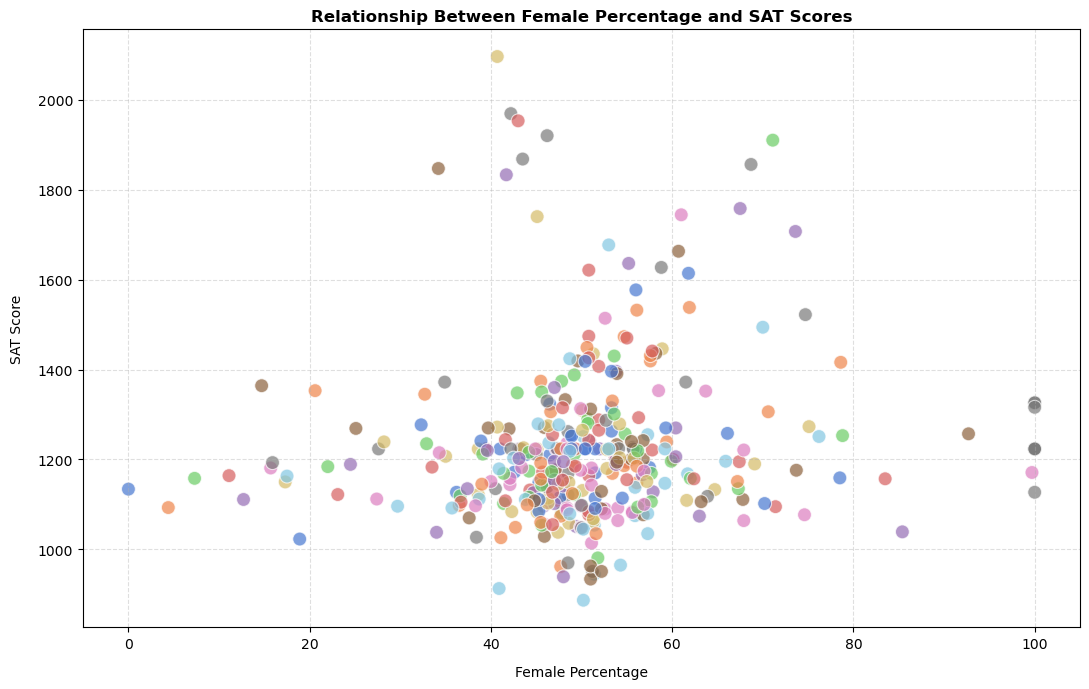

In [90]:
plt.figure(figsize=(11,7))

# Plot a scatter plot
sns.scatterplot(data=combined,
               x='female_per',
               y='sat_score',
               hue=combined['female_per'],
               palette='muted',
               s=100,
               alpha=0.7,
               legend=False)

# Plot title
plt.title('Relationship Between Female Percentage and SAT Scores', weight='bold')
plt.xlabel('Female Percentage', labelpad=10)
plt.ylabel('SAT Score', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Based on the scatter plot, there is a weak possitive correlation between female students and SAT scores. However, there are quite a number of clustered points towards the middle, suggesting that there are schools with high percentage of females i.e. between 60-80% with equally high SAT scores.

In [96]:
high_female_schools = combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]
print(high_female_schools['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools highlighted above offer specialized programs including arts and advanced academic tracks which by extension contribute to high performance.

#### Sources
- [Bard High School Early College](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/bard-high-school-early-college-13062)
- [Eleanor Roosevelt High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/eleanor-roosevelt-high-school-13102)
- [Beacon High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/beacon-high-school-13120)
- [Fiorello H. LaGuardia High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/fiorello-h-laguardia-high-school-13124)
- [Townsend Harris High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/townsend-harris-high-school-13434)

# Exploring AP Scores vs. SAT Scores

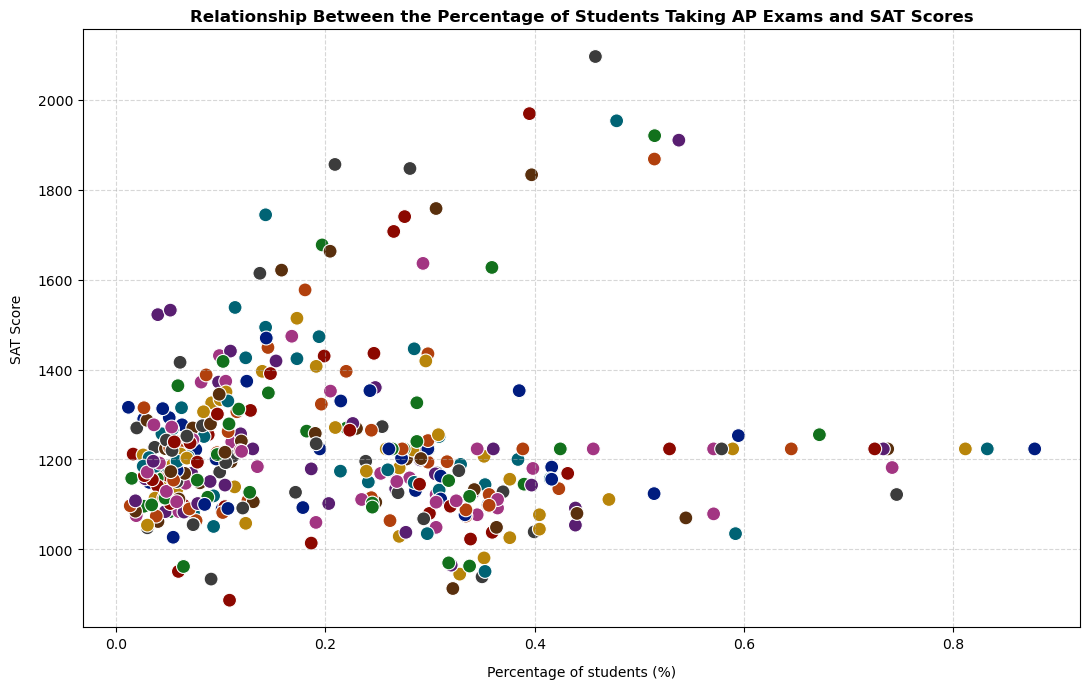

In [118]:
# Calculate the percentage of students in each school that took an AP exam
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

plt.figure(figsize=(11,7))

# Create a scatter plot
sns.scatterplot(data=combined,
               x='ap_per',
               y='sat_score',
               hue=combined['ap_per'],
               palette='dark',
               s=100,
               legend=False
               )

# Set the title
plt.title('Relationship Between the Percentage of Students Taking AP Exams and SAT Scores', fontweight='bold')

# Set labels
plt.xlabel('Percentage of students (%)', labelpad=10)
plt.ylabel('SAT Score', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

There seem to be a noticable possitive correlation though it is weak. Schools with a higher percentage of students taking AP exams tend to have higher SAT scores. 
While AP participation is a possitive indicator of SAT success, it is evident that other factors play significant roles in determinig SAT scores.

# Exploring Class Size vs SAT Scores

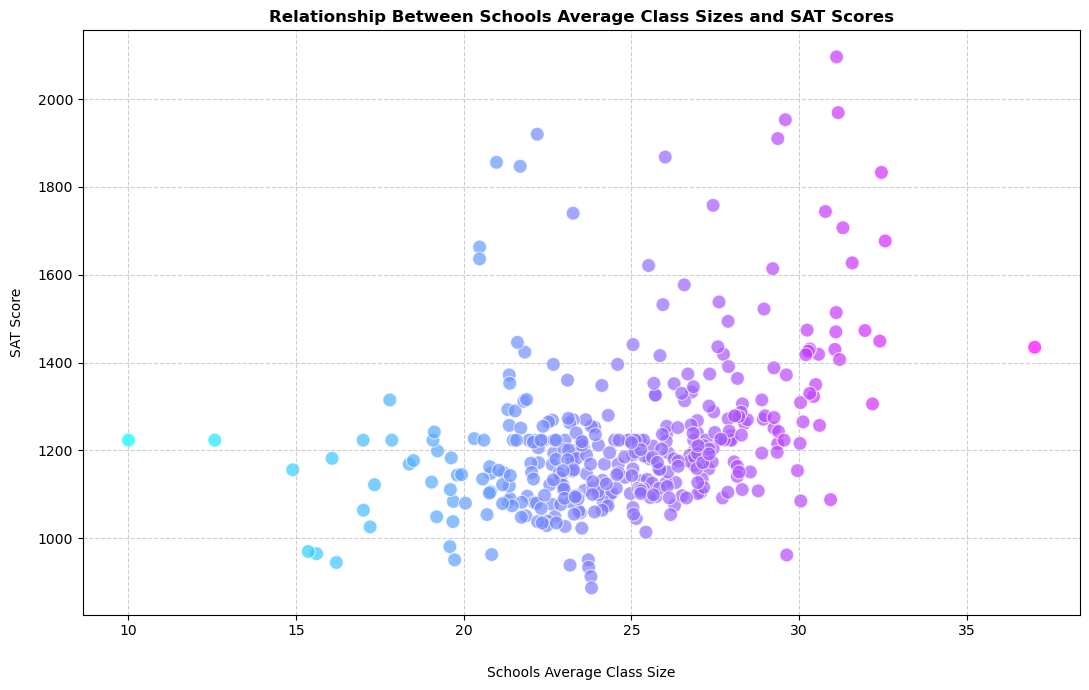

In [120]:
plt.figure(figsize=(11,7))

# Generate a scatter plot
sns.scatterplot(data=combined,
               x='AVERAGE CLASS SIZE',
               y= 'sat_score',
               hue=combined['AVERAGE CLASS SIZE'],
               palette='cool',
               s=100,
               alpha=0.7,
               legend=False)

# Set the title
plt.title('Relationship Between Schools Average Class Sizes and SAT Scores', weight='bold')

# Set the labels
plt.xlabel('Schools Average Class Size', labelpad=20)
plt.ylabel('SAT Score', labelpad=10)

#Add a grid with dashed lines and transparency
plt.grid(True, linestyle='--', alpha=0.6)

# Set the font sizes for the x and y axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

The scatter plot above shows a possitive correlation between class size and the SAT score. Schools with a higher average class size tend to have high SAT scores compared to schools with a lower average class size.

# Conclusion

We have done some investigation to determine the relationships between demographics and SAT scores. The analysis highlights complex relationship between the SAT scores and variables across the diverse NYC boroughs.
Some interesting findings unveil the influence of socio-economic advantages and cultural emphasis on eduction. We've seen that white and asian dorminated schools show a possitive correlation to SAT scores as to compared to black and hispanic dorminated schools

We've also established how geographical positioning may affect the relationship between student safety and SAT scores. The analysis suggests that student safety is an important factor in academic performance, with safer boroughs generally showing higher SAT scores. This aligns with findings from the [ArcGIS article](https://storymaps.arcgis.com/stories/cfd12d58b9ee456da720af733071fd29), which emphasizes the role of school environment in student outcomes.

Conclusively, policy changes and affirmative actions should be embraced into ensuring that there is no entitlement that leads to unfair advantage or inequality in educational opportunities.